In [1]:
cd G:\machine learning\data

G:\machine learning\data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('disaster_tweets_train.csv')

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


## Analysis of dataset

In [6]:
data = df.copy()

In [7]:
data['text'][(data['target'] == 1)]


0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 3271, dtype: object

In [8]:
data['text'][(data['target'] == 1).to_numpy()][1]


'Forest fire near La Ronge Sask. Canada'

In [9]:
data['text'][(data['target'] == 1).to_numpy()][4]


'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school '

In [10]:
data['text'][(data['target'] == 1).to_numpy()][:5]


0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [11]:
data['text'][(data['target'] == 1).to_numpy()][7]


"I'm on top of the hill and I can see a fire in the woods..."

In [12]:
data['keyword'].fillna(value = 'None',inplace  = True)

In [13]:
data['target_mean'] = data.groupby(by ='keyword')['target'].transform(np.mean)

In [14]:
data.groupby(by ='keyword')['target'].transform(np.mean)

0       0.688525
1       0.688525
2       0.688525
3       0.688525
4       0.688525
          ...   
7608    0.688525
7609    0.688525
7610    0.688525
7611    0.688525
7612    0.688525
Name: target, Length: 7613, dtype: float64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
id             7613 non-null int64
keyword        7613 non-null object
location       5080 non-null object
text           7613 non-null object
target         7613 non-null int64
target_mean    7613 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 357.0+ KB


In [16]:
data.head()

,id,keyword,location,text,target,target_mean
0,1,None,NaN,Our Deeds are the Reason of this #earthquake M...,1,0.688525
1,4,None,NaN,Forest fire near La Ronge Sask. Canada,1,0.688525
2,5,None,NaN,All residents asked to 'shelter in place' are ...,1,0.688525
3,6,None,NaN,"13,000 people receive #wildfires evacuation or...",1,0.688525
4,7,None,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0.688525


In [17]:
data['keyword'].value_counts()

None                     61
fatalities               45
deluge                   42
armageddon               42
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 222, dtype: int64

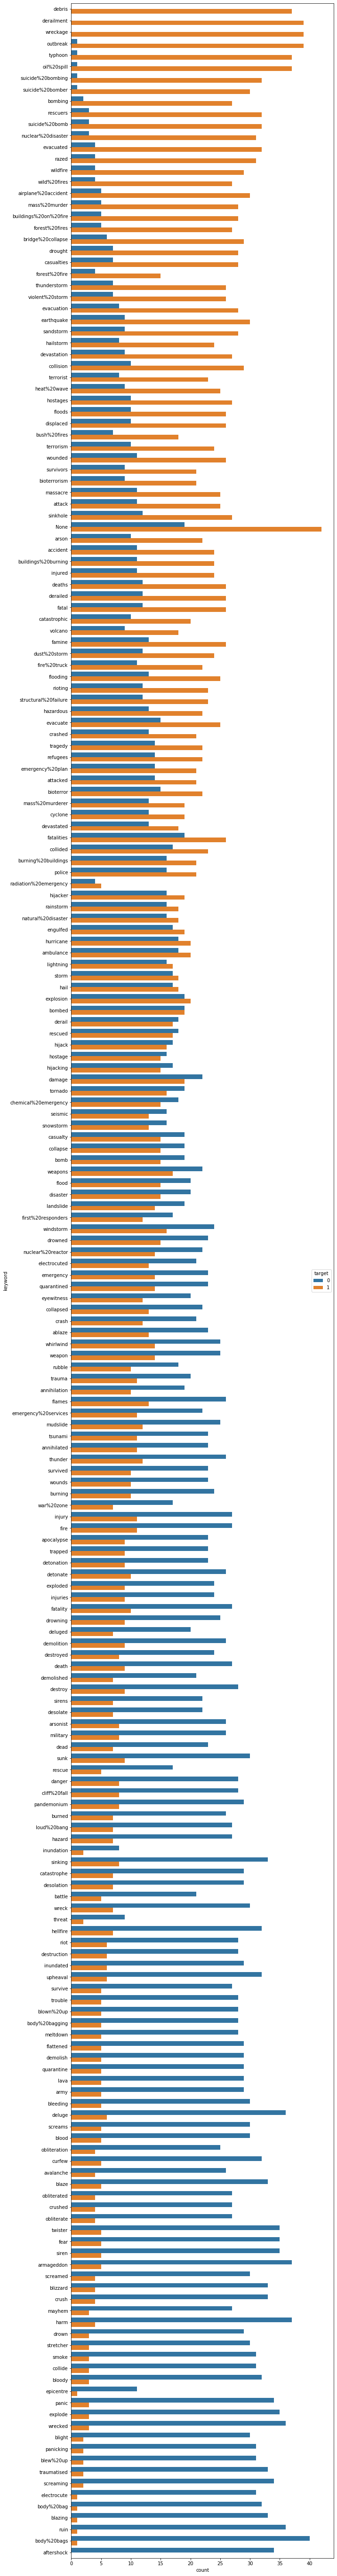

In [18]:
plt.figure(figsize =(10,100))
sns.countplot(y= data.sort_values(by ='target_mean',ascending= False)['keyword'],hue=data.sort_values(by ='target_mean',ascending= False)['target'])

In [19]:
test_df = pd.read_csv('disaster_tweets_test.csv',index_col = 'id')

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3263 entries, 0 to 10875
Data columns (total 3 columns):
keyword     3237 non-null object
location    2158 non-null object
text        3263 non-null object
dtypes: object(3)
memory usage: 102.0+ KB


In [21]:
test_data = test_df.copy()

In [22]:
test_data['keyword'].fillna(value = 'None',inplace = True)



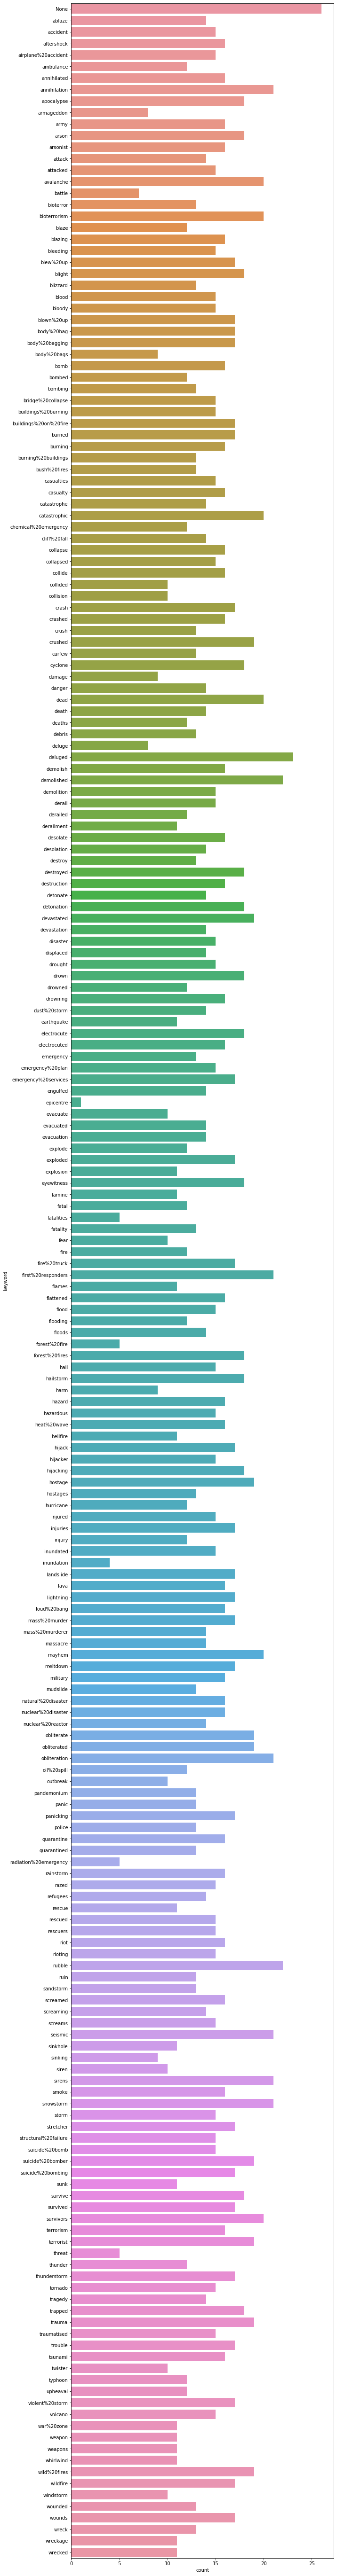

In [23]:
plt.figure(figsize =(10,100))
sns.countplot(y =test_data['keyword'] ,data = test_data)

In [24]:
test_data['keyword'].value_counts()

None             26
deluged          23
rubble           22
demolished       22
snowstorm        21
                 ..
threat            5
fatalities        5
forest%20fire     5
inundation        4
epicentre         1
Name: keyword, Length: 222, dtype: int64

In [25]:
data.drop(columns = 'target_mean',inplace = True)

In [26]:
data.head()

,id,keyword,location,text,target
0,1,None,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,None,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,None,NaN,All residents asked to 'shelter in place' are ...,1
3,6,None,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,None,NaN,Just got sent this photo from Ruby #Alaska as ...,1


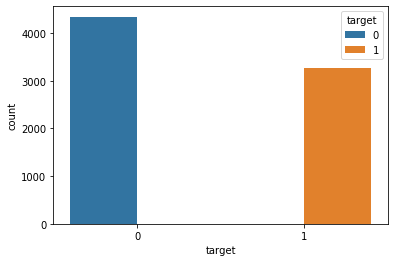

In [27]:
sns.countplot(x= data.target ,hue =data.target)

([<matplotlib.patches.Wedge at 0x23e662daf88>,
 [Text(-0.24110481617711207, 1.0732513534192263, ''),
  Text(0.24110481617711216, -1.0732513534192263, '')],
 [Text(-0.13151171791478838, 0.5854098291377597, '57'),
  Text(0.13151171791478844, -0.5854098291377597, '43')])

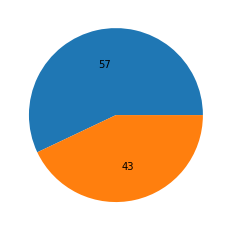

In [28]:
plt.pie(data['target'].value_counts(),autopct = '%1.0f')

Hence 57% of the data is non_disasterous and 47% is disasterous

In [29]:
Data = df.copy()

In [30]:
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_colwidth' ,-1)

x_data = Data.drop(columns  = 'target')
y_data = Data['target']

In [31]:
x_data[Data['target'] == 0].head(5)

,id,keyword,location,text
15,23,NaN,NaN,What's up man?
16,24,NaN,NaN,I love fruits
17,25,NaN,NaN,Summer is lovely
18,26,NaN,NaN,My car is so fast
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!


In [32]:
x_data[Data['target'] == 1].head(5)

,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California"
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school


#### Hence disasterous tweets are more formal and longer

In [33]:
Data.describe(include = 'object')

,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...
freq,45,104,10


1. Only text column is fully filled.
2. Some tweets are duplicates.one of the tweet is appearing 10 times
3. 99% of the 'keyword' column is filled
5. most frequent keyword is  fatalities
6. 67% of tweets have location data

In [34]:
Data.describe(include = 'number')

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [35]:
for _,g in Data.groupby(by ='target'):
    print()

#### Columns of duplicate tweets

In [36]:
train_part = pd.concat(g for _ , g in Data.groupby(by='text') if len(g)>1)
train_part

,id,keyword,location,text,target
4290,6094,hellfire,"Jubail IC, Saudi Arabia.",#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect,0
4299,6105,hellfire,?????? ??? ?????? ????????,#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect,0
4312,6123,hellfire,?????? ???? ??????,#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect,1
6363,9095,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
6366,9098,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
...,...,...,...,...,...
6094,8702,sinking,NaN,that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time,0
6103,8714,sinking,NaN,that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time,0
6123,8739,sinking,MA,that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time,1
5620,8018,refugees,NaN,wowo--=== 12000 Nigerian refugees repatriated from Cameroon,1


. Some of the tweets have different target value, different location for the duplicates

In [37]:
train_part.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 4290 to 5641
Data columns (total 5 columns):
id          179 non-null int64
keyword     174 non-null object
location    98 non-null object
text        179 non-null object
target      179 non-null int64
dtypes: int64(2), object(3)
memory usage: 8.4+ KB


### Creat keyword list

In [38]:
keyword_list = Data['keyword'].unique()
#to delete nan from array
keyword_list = np.delete(keyword_list, 0)

test = pd.read_csv('disaster_tweets_test.csv')

keyword_list2 = test.keyword.unique()
# to drop nan from array
keyword_list2 = np.delete(keyword_list2,0)

In [159]:
def has_keyword(sentence ,lis) :
    for word in lis :
        if sentence.find(word) != -1 :
            return word
    return ''
def number_of_keywords(sentence,lis):
    count  = 0
    for word in lis :
        if sentence.find(word) != -1:
            count +=1
    return count
def haslink(sentence):
    return sentence.count('http')

In [40]:
for i in range(len(Data)):
    if pd.isnull(Data.loc[i,'keyword']):
        Data.loc[i,'keyword'] = has_keyword(str.lower(Data.loc[i,'text']),keyword_list)
    

In [42]:
for i in range(len(test)):
    if pd.isnull(test.loc[i,'keyword']) :
        test.loc[i,'keyword'] = has_keyword(test.loc[i,'text'].lower(),keyword_list2)
        

In [43]:
# to drop duplicates
index = Data['text'].duplicated()
# print(index)

# index == False

new_Data = Data[index == False]



In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
id          3263 non-null int64
keyword     3263 non-null object
location    2158 non-null object
text        3263 non-null object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [45]:
len(data.keyword.unique())

222

In [46]:
from sklearn.base import BaseEstimator ,TransformerMixin
class add_attributes(BaseEstimator,TransformerMixin) :
    def fit(self,x,y= None) :
        return self
    def transform(self,x,y=None) :
        x['length_of_text'] = x.apply(lambda row : len(row.text) ,axis =1)
        x['nb_of_keywords'] = x.apply(lambda row :number_of_keywords(row.text.lower(),keyword_list),axis =1)
        x['wordcount'] = x.apply(lambda row: len(row.text.split()),axis =1)
        x['url'] = x.apply(lambda row : haslink(row.text.lower()),axis =1)
        x['av_word_length'] = x.apply(lambda row :row.length_of_text/row.wordcount ,axis =1)
        x['loc'] = x.apply(lambda row :1 if not pd.isnull(row.location) else 0,axis =1)
        x['key'] = x.apply(lambda row : 1 if len(row.keyword.strip()) else 0 ,axis = 1)
        return x

In [47]:
add_attr = add_attributes()
train = add_attr.fit_transform(new_Data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [48]:
train.head(20)

,id,keyword,location,text,target,length_of_text,nb_of_keywords,wordcount,url,av_word_length,loc,key
0,1,earthquake,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,69,1,13,0,5.307692,0,1
1,4,fire,NaN,Forest fire near La Ronge Sask. Canada,1,38,1,7,0,5.428571,0,1
2,5,evacuation,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,133,1,22,0,6.045455,0,1
3,6,evacuation,NaN,"13,000 people receive #wildfires evacuation orders in California",1,65,3,8,0,8.125000,0,1
4,7,fire,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,88,3,16,0,5.500000,0,1
5,8,fire,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1,110,2,18,0,6.111111,0,1
6,10,disaster,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1,95,3,14,0,6.785714,0,1
7,13,fire,NaN,I'm on top of the hill and I can see a fire in the woods...,1,59,1,15,0,3.933333,0,1
8,14,emergency,NaN,There's an emergency evacuation happening now in the building across the street,1,79,2,12,0,6.583333,0,1
9,15,tornado,NaN,I'm afraid that the tornado is coming to our area...,1,52,1,10,0,5.200000,0,1


In [49]:
new_test = add_attr.transform(test)

In [50]:
new_test

,id,keyword,location,text,length_of_text,nb_of_keywords,wordcount,url,av_word_length,loc,key
0,0,crash,NaN,Just happened a terrible car crash,34,1,6,0,5.666667,0,1
1,2,earthquake,NaN,"Heard about #earthquake is different cities, stay safe everyone.",64,1,9,0,7.111111,0,1
2,3,fire,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",96,1,19,0,5.052632,0,1
3,9,apocalypse,NaN,Apocalypse lighting. #Spokane #wildfires,40,3,4,0,10.000000,0,1
4,11,typhoon,NaN,Typhoon Soudelor kills 28 in China and Taiwan,45,1,8,0,5.625000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3258,10861,earthquake,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTENERS XrWn,55,1,8,0,6.875000,0,1
3259,10865,bomb,NaN,Storm in RI worse than last hurricane. My city&amp;3others hardest hit. My yard looks like it was bombed. Around 20000K still without power,139,4,23,0,6.043478,0,1
3260,10868,derail,NaN,Green Line derailment in Chicago http://t.co/UtbXLcBIuY,55,2,6,1,9.166667,0,1
3261,10874,hazard,NaN,MEG issues Hazardous Weather Outlook (HWO) http://t.co/3X6RBQJHn3,65,2,7,1,9.285714,0,1


## Data Analysis

Text(0.5, 1.0, 'Impact of key on target')

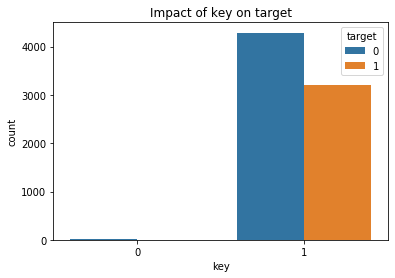

In [51]:
sns.countplot(x=train.key , hue = train.target )
plt.title('Impact of key on target')


Hence keys are mostlty filled for disasterous and non_disasterous tweets both. Hence we cannot identify much on the basis of keyword presence

Text(0.5, 1.0, 'impact of number of keywords')

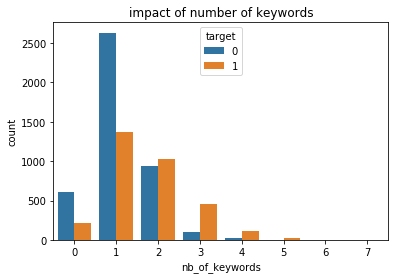

In [52]:
sns.countplot(x = train.nb_of_keywords , hue = train.target)
plt.title('impact of number of keywords')

Disasterous tweets have more number of keywords

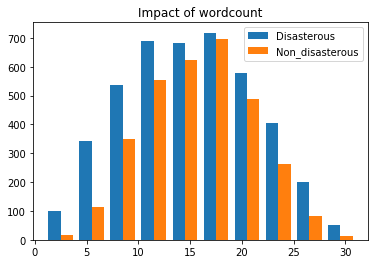

In [53]:
plt.hist([train[train.target ==0].wordcount,train[train.target ==1].wordcount],label =['Disasterous', 'Non_disasterous'])
plt.title('Impact of wordcount')
plt.legend()

above plot shows less word count has more chance of being non_disasterous



Text(0.5, 1.0, 'impact of url in tweets')

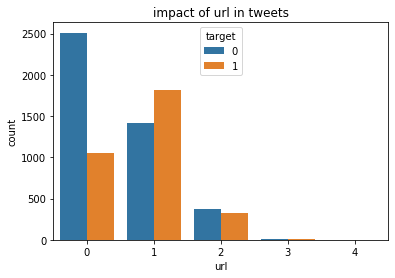

In [54]:
sns.countplot(x = train.url,hue= train.target)
plt.title('impact of url in tweets')

Hence Disasterous tweets generally have urls than non_disasterous

Text(0.5, 1.0, 'Impact of given location')

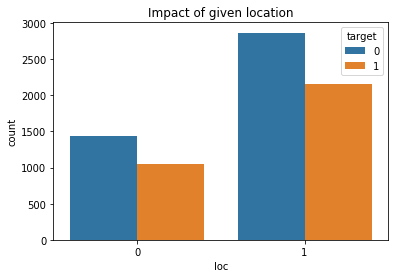

In [55]:
sns.countplot(x = train['loc'] , hue = train.target)
plt.title('Impact of given location')

Hence we cannot identify much on the basis of location is given or not

Text(0.5, 1.0, 'impact of lenght of text')

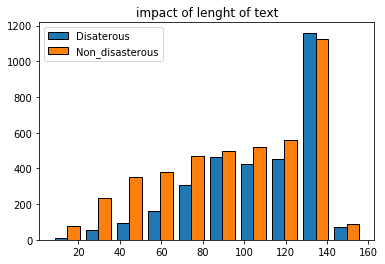

In [56]:
plt.hist([train[train.target ==1].length_of_text,train[train.target ==0].length_of_text],label =['Disaterous','Non_disasterous'] ,edgecolor ='k')
plt.legend()
plt.title('impact of lenght of text')

Hence small texts are generally Non_disasterous

Text(0.5, 1.0, 'impact of lenght of average word length')

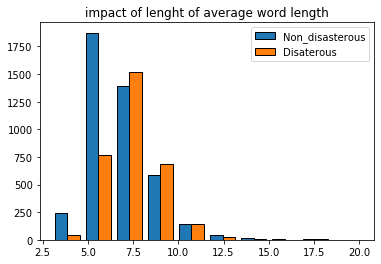

In [57]:
plt.hist([train[train.target ==0].av_word_length,train[train.target ==1].av_word_length],label =['Non_disasterous','Disaterous'] ,edgecolor ='k')
plt.legend()
plt.title('impact of lenght of average word length')

Hence Non_disasterous tweets have small word length

Text(0.5, 1.0, 'tweets length of text for character count')

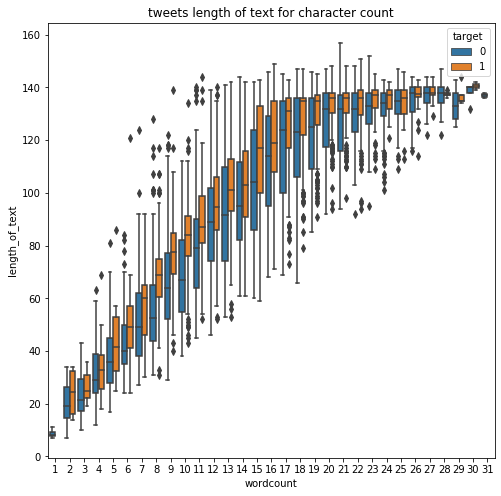

In [61]:
plt.figure(figsize =(8,8))
sns.boxplot(x = train.wordcount , y = train.length_of_text ,hue = train.target,)
plt.title('tweets length of text for character count')

Hence the above box plot for target 1 the lower whisker is always above than lower whisker for target 0

Hence the disasterous tweets has generally more characters 

Text(0.5, 1.0, 'Tweets length by number of keywords')

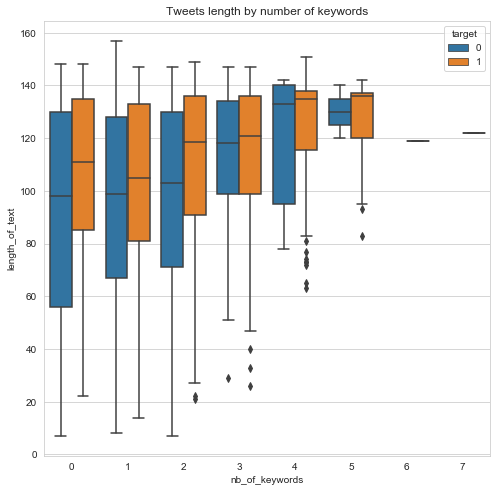

In [63]:
plt.figure(figsize = (8,8))
sns.set_style('whitegrid')
sns.boxplot(x = train.nb_of_keywords ,y = train.length_of_text,hue = train.target)
plt.title('Tweets length by number of keywords')

Hence disasterous tweets is lengthy than non_disasterous for given number of keywords

Text(0.5, 1.0, 'Tweets length by filled location or not')

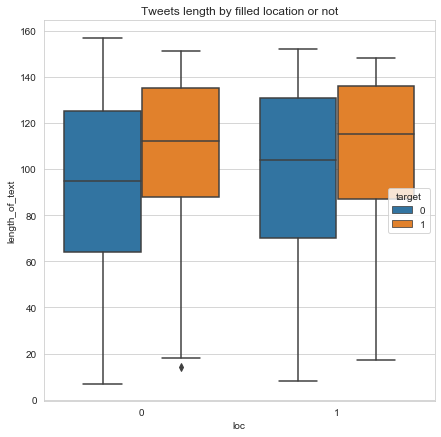

In [64]:
plt.figure(figsize = (7,7))
sns.boxplot(x= train['loc'] , y =train.length_of_text ,hue = train.target)
plt.title('Tweets length by filled location or not')

Hence disasterous tweets number of character doesn't depend on location .

In [88]:
features = ['keyword','length_of_text' ,'wordcount' , 'nb_of_keywords','url','av_word_length' , 'loc']
X_train = train[features]
Y_train = train['target']

In [95]:
from sklearn.base import BaseEstimator ,TransformerMixin
class numerical(BaseEstimator,TransformerMixin):
    def fit(self,x,y=None): 
        return self
    def transform(self,x,y = None):
        return x.to_numpy()

In [96]:
class feature_selection(BaseEstimator,TransformerMixin):
    def __init__(self,attributes):
        self.attributes = attributes 
    def fit(self,x,y=None):
        return self
    def transform(self,x,y=None):
        return x[self.attributes]
        

In [97]:
from sklearn.pipeline import Pipeline , FeatureUnion
from sklearn.preprocessing import OneHotEncoder
cat = ['keyword']
num  = ['length_of_text' ,'wordcount' , 'nb_of_keywords','url','av_word_length' , 'loc']
cat_pip = Pipeline([('features' ,feature_selection(cat) ),('encoding' , OneHotEncoder(sparse = False))])
num_pip = Pipeline([('features' ,feature_selection(num) ),('numerical',numerical())])
full_pip = FeatureUnion([('numerical' , num_pip),('categorical' ,cat_pip)])
xx_train = full_pip.fit_transform(X_train)

In [98]:
xx_train.shape

(7503, 228)

## Training model

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(max_depth=3 , n_estimators =100)

In [100]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score,recall_score,accuracy_score, confusion_matrix

In [102]:
gbrt_pred = cross_val_predict(gbrt,xx_train,Y_train,cv =10,method = 'predict')

In [103]:
accuracy_score(Y_train,gbrt_pred)

0.6110888977742236

In [104]:
confusion_matrix(Y_train,gbrt_pred)

array([[3340,  965],
       [1953, 1245]], dtype=int64)

In [107]:
from sklearn.svm import SVC
svm = SVC(gamma = 'auto')

In [109]:
svm_pred = cross_val_predict(svm,xx_train,Y_train,cv =5,method = 'predict')

In [110]:
accuracy_score(Y_train,svm_pred)

0.6628015460482474

In [111]:
from sklearn.model_selection import GridSearchCV
c = [0.1,1,10,100,200]
gamma = [0.1,1,10]
params = {'C':[0.1,1,10,100,200],'gamma':[0.1,1,10]}
grid = GridSearchCV(SVC(),param_grid =params,cv =5,n_jobs =-1)

In [112]:
grid.fit(xx_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 200], 'gamma': [0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [113]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [114]:
grid.best_score_

0.663734506197521

In [122]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(solver = 'lbfgs',max_iter =1000)

In [123]:
log_pred = cross_val_predict(log_clf,xx_train,Y_train,cv =5,method = 'predict')

In [124]:
accuracy_score(Y_train,log_pred)

0.5900306544049047

In [125]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
log_clf= LogisticRegression(solver = 'lbfgs',max_iter =1000)
bag_clf = BaggingClassifier(log_clf,n_estimators =1000)

In [128]:
bag_clf.fit(xx_train,Y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None,
                                                    max_iter=1000,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=1000, n_jobs=None

In [129]:
bag_pred = bag_clf.predict(xx_train)

In [130]:
accuracy_score(Y_train,bag_pred)

0.7802212448353991

## Using nltk

Separate Disasterous and Non_disasterous texts

In [279]:
Disasterous = data[data['target'] ==1]['text'].to_list()

print('Disasterous : \n',Disasterous[:2])

Non_Disasterous = data[data['target'] ==0]['text'].to_list()
print('Non_disasterous:\n' ,Non_Disasterous[:2])


disasterous_keyword = data[data['target'] ==1]['keyword'].to_list()
print('length of disasterous_keyword  : ',len(disasterous_keyword ))
non_disasterous_keyword = data[data['target'] == 0]['keyword'].to_list()
print('length of non_disasterous_keyword  : ',len(non_disasterous_keyword ))
#combine keyword with text
for i in range(len(Disasterous)):
    Disasterous[i] += ' '+disasterous_keyword[i]
for j in range(len(Non_Disasterous)):
    Non_Disasterous[j] += ' ' +  non_disasterous_keyword[j]
    
    

Disasterous : 
 ['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all', 'Forest fire near La Ronge Sask. Canada']
Non_disasterous:
 ["What's up man?", 'I love fruits']
length of disasterous_keyword  :  3271
length of non_disasterous_keyword  :  4342


In [280]:
Disasterous[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all None'

In [281]:
non_disasterous_keyword[:5]

['None', 'None', 'None', 'None', 'None']

In [282]:
Non_Disasterous[0]

"What's up man? None"

In [283]:
from nltk import RegexpTokenizer
from nltk.util import ngrams

In [284]:
# import nltk
# nltk.download('stopwords')

In [285]:
import re
from collections import Counter
from sklearn.base import BaseEstimator ,TransformerMixin
from urlextract import URLExtract
url_extractor = URLExtract()
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
class Text_tovocabulary(BaseEstimator,TransformerMixin):
    def fit(self,x,y= None):
        return self
    def transform(self,x,y =None ):
        X_transformed =[]
        for text in x :
            text.lower()
            urls = list(set(url_extractor.find_urls(text)))
            for url in urls:
                text.replace(url,'URL')
           
            # to remove panctuation
            tokenizer = RegexpTokenizer('\w+')
            word_token = tokenizer.tokenize(text)
            #to remove stop words
            stop_words = set(stopwords.words('english'))
            count = Counter()
            word_list= []
            for word in word_token :
                if word not in stop_words :
                    word_list.append(word)
            count.update(word_list)
            #stemming words
            ps = PorterStemmer()
            stemmed_counter = Counter()
            for word,count in count.items() :
                stemmed_counter[ps.stem(word)] +=count
            X_transformed.append(stemmed_counter)
        
        return X_transformed
                    
    
            
    


In [286]:
from scipy.sparse import csr_matrix
class text_tovector(BaseEstimator,TransformerMixin):
    def __init__(self,vocabulary_size =5000):
        self.vocabulary_size = vocabulary_size
    def fit(self,x,y=None):
        #To store total count 
        total_count = Counter()
        for word_count in x: 
            for word , count in word_count.items() :
                total_count[word] += count
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.vocabulary= {word:index+1 for index,(word,count) in enumerate(most_common)}
        return self
    def transform(self,x,y= None):
        rows  = []
        columns = []
        data = []
        for row, word_count in enumerate(x) :
            for word,count in  word_count.items() :
                rows.append(row)
                columns.append(self.vocabulary.get(word,0))
                data.append(count)
        return csr_matrix((data,(rows,columns)),shape= (len(x),self.vocabulary_size +1))
                
        

In [287]:
transfomer  = Text_tovocabulary()
transfomed = transfomer.fit_transform(Disasterous[:3])

In [288]:
transfomed

[Counter({'our': 1,
          'deed': 1,
          'reason': 1,
          'earthquak': 1,
          'may': 1,
          'allah': 1,
          'forgiv': 1,
          'us': 1,
          'none': 1}),
 Counter({'forest': 1,
          'fire': 1,
          'near': 1,
          'La': 1,
          'rong': 1,
          'sask': 1,
          'canada': 1,
          'none': 1}),
 Counter({'all': 1,
          'resid': 1,
          'ask': 1,
          'shelter': 2,
          'place': 2,
          'notifi': 1,
          'offic': 1,
          'No': 1,
          'evacu': 1,
          'order': 1,
          'expect': 1,
          'none': 1})]

In [289]:
vector = text_tovector()
vector.fit_transform(transfomed).toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 2, ..., 0, 0, 0]], dtype=int32)

## Data Cleaning

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7613 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [291]:
from nltk import RegexpTokenizer
key  = data['keyword'].to_list()
new_key = []
token = RegexpTokenizer(r'[A-Za-z]+')
for word in key :
    new_word = token.tokenize(word)
    new_key.append(' '.join(new_word))
print(len(new_key))

7613


In [292]:
data['keyword'] = np.array(new_key).reshape(-1,1)

In [293]:
train_text = data['text'].to_list()
for i in range(len(train_text)) :
    train_text[i] += ' ' + new_key[i]

In [294]:
train_text[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all None'

In [295]:
#Now convert text into vector 
from sklearn.pipeline import Pipeline 
pipeline = Pipeline([('vocabulary' , Text_tovocabulary()),('vector',text_tovector())])
x_train = pipeline.fit_transform(train_text)

In [296]:
x_train = x_train.toarray()

In [297]:
x_train.shape

(7613, 5001)

## Train Model

In [329]:
from sklearn.model_selection import train_test_split
y_train  = data['target']
X_train , X_test , Y_train , Y_test = train_test_split(x_train,y_train,test_size = 0.2)

In [330]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(solver = 'lbfgs',random_state =42,max_iter =1000)

In [331]:
from sklearn.model_selection import cross_val_predict
y_pred  = cross_val_predict(log_clf,X_train,Y_train,cv =10,method = 'predict')

In [332]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(Y_train,y_pred)
con_matrix

array([[2961,  496],
       [ 750, 1883]], dtype=int64)

In [333]:
from sklearn.metrics import precision_score , recall_score
precision_score(Y_train,y_pred)

0.7915090374106768

In [334]:
recall_score(Y_train,y_pred)

0.715153816938853

In [64]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()

In [312]:
nb_pred = cross_val_predict(multi_nb,X_train,Y_train,cv = 5,method = 'predict')

In [313]:
confusion_matrix(Y_train,nb_pred)

array([[2922,  548],
       [ 720, 1900]], dtype=int64)

In [314]:
from sklearn.metrics import precision_score , recall_score
pre_score = precision_score(Y_train,nb_pred)
rec_score = recall_score(Y_train,nb_pred)

In [315]:
pre_score

0.7761437908496732

In [316]:
rec_score

0.7251908396946565

In [317]:
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_train,nb_pred)
score

0.7917898193760263

In [306]:
# pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [307]:
import xgboost

In [71]:
from xgboost import XGBClassifier 
xgb  = XGBClassifier(max_depth=2,n_estimators =200,colsample_bytree=0.8,colsample_bylevel =0.8,colsample_bynode = 0.8)

In [72]:
xgb_pred = cross_val_predict(xgb,X_train,Y_train,cv= 5,method ='predict')

In [73]:
confusion_matrix(Y_train,xgb_pred)

array([[3067,  382],
       [ 986, 1655]], dtype=int64)

In [74]:
accuracy_score(Y_train,xgb_pred)

0.7753694581280788

In [75]:
precision_score(Y_train,xgb_pred)

0.8124693176239568

In [76]:
recall_score(Y_train,xgb_pred)

0.6266565694812571

In [82]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(multi_nb ,n_estimators =200,max_features = 0.6,max_samples =0.8,bootstrap_features = True)

In [87]:
bag_pred = cross_val_predict(bag_clf ,X_train,Y_train, cv = 5,method = 'predict')

In [88]:
confusion_matrix(Y_train,bag_pred)

array([[2947,  502],
       [ 731, 1910]], dtype=int64)

In [337]:
multi_nb.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [339]:
nb_pred1= multi_nb.predict(X_test)

In [341]:
accuracy_score(Y_test,nb_pred1)

0.793827971109652

In [342]:
confusion_matrix(Y_test,nb_pred1)

array([[754, 122],
       [192, 455]], dtype=int64)

In [374]:
multi_nb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Test Model

In [344]:
test_data = pd.read_csv('disaster_tweets_test.csv',index_col = 'id')

In [345]:
test_data.head()

,keyword,location,text
id,,,
0,NaN,NaN,Just happened a terrible car crash
2,NaN,NaN,"Heard about #earthquake is different cities, s..."
3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [346]:
test = test_data.copy()

In [348]:
test['keyword'].fillna(value = 'None',inplace = True)

In [352]:
test_key  = test['keyword'].to_list()
test_new_key = []
token = RegexpTokenizer(r'[A-Za-z]+')
for word in test_key :
    test_new_word = token.tokenize(word)
    test_new_key.append('_'.join(test_new_word))
print(len(test_new_key))

3263


In [353]:
test_text = test['text'].to_list()
for i in range(len(test_text)) :
    test_text[i] += ' ' + test_new_key[i]

In [356]:
x_test = pipeline.transform(test_text)

In [358]:
x_test = x_test.toarray()

In [359]:
x_test.shape

(3263, 5001)

In [360]:
pred = multi_nb.predict(x_test)

In [361]:
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [384]:
id = test_data.index.to_numpy()
id.max()

10875

In [366]:
pred.shape

(3263,)

In [381]:
test_df = pd.DataFrame(index = id ,data = pred,columns = ['target'])

In [382]:
test_df

,target
0,1
2,1
3,1
9,1
11,1
...,...
10861,1
10865,0
10868,1
10874,1


In [383]:
test_df.to_csv('disasterous_tweets_res.csv')

## Text Cleaning

In [181]:
data3 =df.copy()

In [182]:
import re
from collections import Counter
from sklearn.base import BaseEstimator ,TransformerMixin
from urlextract import URLExtract
url_extractor = URLExtract()
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
class Text_transform(BaseEstimator,TransformerMixin):
    def fit(self,x,y= None):
        return self
    def transform(self,X,Y =None ):
        x = X.text.to_list()
        X_transformed = []
        for text in x :
            text.lower()
            urls = list(set(url_extractor.find_urls(text)))
            for url in urls:
                text.replace(url,'URL')
        
            # to remove panctuation
            tokenizer = RegexpTokenizer('\w+')
            word_token = tokenizer.tokenize(text)
            #to remove stop words
            stop_words = set(stopwords.words('english'))
            count = Counter()
            word_list= []
            for word in word_token :
                if word not in stop_words :
                    word_list.append(word)
            X_transformed.append(' '.join(word_list))
        return np.array(X_transformed).reshape(-1,1)
            
            
                    
    
            
    


In [183]:
transform = Text_transform()
data3['text'] = transform.fit_transform(data3)

In [184]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [185]:
keyword_list = data3['keyword'].unique()
#to delete nan from array
keyword_list = np.delete(keyword_list, 0)

test = pd.read_csv('disaster_tweets_test.csv')

keyword_list2 = test.keyword.unique()
# to drop nan from array
keyword_list2 = np.delete(keyword_list2,0)

def has_keyword(sentence ,lis) :
    for word in lis :
        if sentence.find(word) != -1 :
            return word
    return ''
def number_of_keywords(sentence,lis):
    count  = 0
    for word in lis :
        if sentence.find(word) != -1:
            count +=1
    return count
def haslink(sentence):
    return sentence.count('http')

In [187]:
for i in range(len(data3)):
    if pd.isnull(data3.loc[i,'keyword']):
        data3.loc[i,'keyword'] = has_keyword(str.lower(data3.loc[i,'text']),keyword_list)
    

In [189]:
data3

,id,keyword,location,text,target
0,1,earthquake,NaN,Our Deeds Reason earthquake May ALLAH Forgive us,1
1,4,fire,NaN,Forest fire near La Ronge Sask Canada,1
2,5,evacuation,NaN,All residents asked shelter place notified officers No evacuation shelter place orders expected,1
3,6,evacuation,NaN,13 000 people receive wildfires evacuation orders California,1
4,7,fire,NaN,Just got sent photo Ruby Alaska smoke wildfires pours school,1
...,...,...,...,...,...
7608,10869,collapse,NaN,Two giant cranes holding bridge collapse nearby homes http co STfMbbZFB5,1
7609,10870,fire,NaN,aria_ahrary TheTawniest The control wild fires California even Northern part state Very troubling,1
7610,10871,volcano,NaN,M1 94 01 04 UTC 5km S Volcano Hawaii http co zDtoyd8EbJ,1
7611,10872,collide,NaN,Police investigating e bike collided car Little Portugal E bike rider suffered serious non life threatening injuries,1


In [190]:
# to drop duplicates
index = data3['text'].duplicated()
# print(index)

# index == False

new_data3 = data3[index == False]



In [191]:
new_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7494 entries, 0 to 7612
Data columns (total 5 columns):
id          7494 non-null int64
keyword     7494 non-null object
location    5016 non-null object
text        7494 non-null object
target      7494 non-null int64
dtypes: int64(2), object(3)
memory usage: 351.3+ KB


In [192]:
from sklearn.base import BaseEstimator ,TransformerMixin
class add_attributes(BaseEstimator,TransformerMixin) :
    def fit(self,x,y= None) :
        return self
    def transform(self,x,y=None) :
        x['length_of_text'] = x.apply(lambda row : len(row.text) ,axis =1)
        x['nb_of_keywords'] = x.apply(lambda row :number_of_keywords(row.text.lower(),keyword_list),axis =1)
        x['wordcount'] = x.apply(lambda row: len(row.text.split()),axis =1)
        x['url'] = x.apply(lambda row : haslink(row.text.lower()),axis =1)
        x['av_word_length'] = x.apply(lambda row :row.length_of_text/row.wordcount ,axis =1)
        x['loc'] = x.apply(lambda row :1 if not pd.isnull(row.location) else 0,axis =1)
        x['key'] = x.apply(lambda row : 1 if len(row.keyword.strip()) else 0 ,axis = 1)
        return x

In [194]:
attibute_adder = add_attributes()
train1 = attibute_adder.fit_transform(new_data3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [195]:
train1

,id,keyword,location,text,target,length_of_text,nb_of_keywords,wordcount,url,av_word_length,loc,key
0,1,earthquake,NaN,Our Deeds Reason earthquake May ALLAH Forgive us,1,48,1,8,0,6.000000,0,1
1,4,fire,NaN,Forest fire near La Ronge Sask Canada,1,37,1,7,0,5.285714,0,1
2,5,evacuation,NaN,All residents asked shelter place notified officers No evacuation shelter place orders expected,1,95,1,13,0,7.307692,0,1
3,6,evacuation,NaN,13 000 people receive wildfires evacuation orders California,1,60,3,8,0,7.500000,0,1
4,7,fire,NaN,Just got sent photo Ruby Alaska smoke wildfires pours school,1,60,3,10,0,6.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7603,10862,quarantine,NaN,Officials say quarantine place Alabama home possible Ebola case developing symptoms http co rqKK15uhEY,1,102,1,14,1,7.285714,0,1
7605,10864,bomb,NaN,flip side I Walmart bomb everyone evacuate stay tuned I blow,1,60,2,11,0,5.454545,0,1
7606,10866,bomb,NaN,Suicide bomber kills 15 Saudi security site mosque Reuters via World Google News Wall http co nF4IculOje,1,104,1,17,1,6.117647,0,1
7608,10869,collapse,NaN,Two giant cranes holding bridge collapse nearby homes http co STfMbbZFB5,1,72,1,11,1,6.545455,0,1


In [200]:
features1 = ['length_of_text' ,'wordcount' , 'nb_of_keywords','url','av_word_length' , 'loc']
X_train1 = train[features1]
Y_train1 = train['target']

In [201]:
svm_pred1 = cross_val_predict(SVC( C= 1,gamma =0.1),X_train1,Y_train1,cv=10,method ='predict')

In [202]:
accuracy_score(Y_train,svm_pred1)

0.6606690657070505

In [265]:
data4 = df.copy()

In [266]:
keyword_list = data4['keyword'].unique()
#to delete nan from array
keyword_list = np.delete(keyword_list, 0)

test = pd.read_csv('disaster_tweets_test.csv')

keyword_list2 = test.keyword.unique()
# to drop nan from array
keyword_list2 = np.delete(keyword_list2,0)

def has_keyword(sentence ,lis) :
    for word in lis :
        if sentence.find(word) != -1 :
            return word
    return ''
def number_of_keywords(sentence,lis):
    count  = 0
    for word in lis :
        if sentence.find(word) != -1:
            count +=1
    return count
def haslink(sentence):
    return sentence.count('http')

In [267]:
for i in range(len(data4)):
    if pd.isnull(data4.loc[i,'keyword']):
        data4.loc[i,'keyword'] = has_keyword(str.lower(data4.loc[i,'text']),keyword_list)
    

In [268]:
data4

,id,keyword,location,text,target
0,1,earthquake,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,fire,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,evacuation,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,evacuation,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,fire,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
...,...,...,...,...,...
7608,10869,collapse,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,10870,fire,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,10871,volcano,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,10872,collide,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1


In [252]:
# # to drop duplicates
# index = data4['text'].duplicated()
# # print(index)

# # index == False

# data4 = data4[index == False]



In [269]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7613 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [270]:
from nltk import RegexpTokenizer
key  = data4['keyword'].to_list()
new_key = []
token = RegexpTokenizer(r'[A-Za-z]+')
for word in key :
    new_word = token.tokenize(word)
    new_key.append(' '.join(new_word))
print(len(new_key))

7613


In [271]:

train_text = data4['text'].to_list()
for i in range(len(train_text)) :
    train_text[i] += ' ' + key[i]

In [272]:
#Now convert text into vector 
from sklearn.pipeline import Pipeline 
pipeline = Pipeline([('vocabulary' , Text_tovocabulary()),('vector',text_tovector())])
x_train2 = pipeline.fit_transform(train_text)

In [273]:
x_train2.shape

(7613, 5001)

In [274]:
y_train2 = data4.target

In [318]:
from sklearn.model_selection import train_test_split

X_train1 , X_test1 , Y_train1 , Y_test1 = train_test_split(x_train2,y_train2,test_size = 0.2)

In [319]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()

In [320]:
nb_pred = cross_val_predict(multi_nb,X_train1,Y_train1,cv=7,method ='predict')

In [321]:
accuracy_score(Y_train1,nb_pred)

0.7967159277504106

In [404]:
confusion_matrix(Y_train1,nb_pred)

array([[2950,  536],
       [ 702, 1902]], dtype=int64)

In [323]:
bag_clf1 = BaggingClassifier(multi_nb ,n_estimators =1000,n_jobs =-1,bootstrap =True)

In [324]:
bag_clf1.fit(X_train1,Y_train1)

BaggingClassifier(base_estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                               fit_prior=True),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=1000, n_jobs=-1,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [327]:
bag_pre =cross_val_predict(bag_clf1,X_train1,Y_train1,cv=7,method ='predict')

In [328]:
accuracy_score(Y_train1,bag_pre)

0.7957307060755336

In [325]:
bag_pred1  = bag_clf1.predict(X_test1)

In [326]:
accuracy_score(Y_test1,bag_pred1)

0.8049901510177282

In [335]:
from xgboost import XGBClassifier 
xgb  = XGBClassifier(max_depth=2,n_estimators =200,colsample_bytree=0.8,colsample_bylevel =0.8,colsample_bynode = 0.8)

In [336]:
xgb.fit(X_train1,Y_train1)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=0.8,
              colsample_bynode=0.8, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [337]:
accuracy_score(Y_test1,xgb.predict(X_test1))

0.7550886408404465

In [338]:
xgb_pre =cross_val_predict(xgb,X_train1,Y_train1,cv=7,method ='predict')

In [340]:
accuracy_score(Y_train1,xgb_pre)

0.7182266009852217

## Using N_grams

In [344]:
data5 = df.copy()

In [386]:
from nltk.util import ngrams
import re
from collections import Counter
from sklearn.base import BaseEstimator ,TransformerMixin
from urlextract import URLExtract
url_extractor = URLExtract()
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
class Text_tovocabulary(BaseEstimator,TransformerMixin):
    def fit(self,x,y= None):
        return self
    def transform(self,x,y =None ):
        X_transformed =[]
        for text in x :
            text.lower()
            urls = list(set(url_extractor.find_urls(text)))
            for url in urls:
                text.replace(url,'URL')
           
            # to remove panctuation
            tokenizer = RegexpTokenizer('\w+')
            word_token = tokenizer.tokenize(text)
            #to remove stop words
            stop_words = set(stopwords.words('english'))
            count = Counter()
            word_list= []
            for word in word_token :
                if word not in stop_words :
                    word_list.append(word)
             
        
            #stemming words
            ps = PorterStemmer()
#             for i in range(len(word_list)) :
#                 word_list[i] = ps.stem(word_list[i])
            n_grams= ngrams(word_list,3)
#             n_grams_list = [' '.join(grams) for grams in n_grams]
            count = Counter()
            for gram in n_grams :
                count.update(gram)
            X_transformed.append(count)        
        return X_transformed
                    
    
            
    


In [395]:
from scipy.sparse import csr_matrix
class text_tovector(BaseEstimator,TransformerMixin):
    def __init__(self,vocabulary_size =5000):
        self.vocabulary_size = vocabulary_size
    def fit(self,x,y=None):
        #To store total count 
        total_count = Counter()
        for word_count in x: 
            for word , count in word_count.items() :
                total_count[word] += count
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.vocabulary= {word:index+1 for index,(word,count) in enumerate(most_common)}
        return self
    def transform(self,x,y= None):
        rows  = []
        columns = []
        data = []
        for row, word_count in enumerate(x) :
            for word,count in  word_count.items() :
                rows.append(row)
                columns.append(self.vocabulary.get(word,0))
                data.append(count)
        return csr_matrix((data,(rows,columns)),shape= (len(x),self.vocabulary_size +1))
                
        

In [396]:
train_text1 = data5.text.to_list()

In [470]:
trans = Text_tovocabulary()
trans.fit_transform(train_text1[:2])


[Counter({'Our': 1,
          'Deeds': 2,
          'Reason': 3,
          'earthquake': 3,
          'May': 3,
          'ALLAH': 3,
          'Forgive': 2,
          'us': 1}),
 Counter({'Forest': 1,
          'fire': 2,
          'near': 3,
          'La': 3,
          'Ronge': 3,
          'Sask': 2,
          'Canada': 1})]

In [398]:
#Now convert text into vector 
from sklearn.pipeline import Pipeline 
pipeline = Pipeline([('vocabulary' , Text_tovocabulary()),('vector',text_tovector())])
x_train3 = pipeline.fit_transform(train_text1)

In [399]:
y_train3 = data5.target

In [400]:
X_train2 , X_test2 , Y_train2 , Y_test2 = train_test_split(x_train3,y_train3,test_size = 0.2)

In [401]:
nb_predict2 =cross_val_predict(multi_nb,X_train2,Y_train2,cv=7,method = 'predict')

In [402]:
accuracy_score(Y_train2,nb_predict2)

0.7862068965517242

In [403]:
confusion_matrix(Y_train2,nb_predict2)

array([[3018,  473],
       [ 829, 1770]], dtype=int64)

In [417]:
log_clf2 = LogisticRegression(solver ='lbfgs',max_iter =1000,class_weight={0:1,1:5})


In [418]:
log_clf2_pred=cross_val_predict(log_clf2,X_train2,Y_train2,cv=7,method = 'predict')

In [419]:
confusion_matrix(Y_train2,log_clf2_pred)

array([[2463, 1028],
       [ 632, 1967]], dtype=int64)

In [420]:
accuracy_score(Y_train2,log_clf2_pred)

0.7274220032840722

## Stacking

In [471]:
x_stack1,x_stack2 , y_stack1 ,y_stack2 = train_test_split(x_train3,y_train3,test_size =0.5)

In [472]:
log_clf3 = LogisticRegression(solver ='lbfgs',max_iter =1000,class_weight={0:1,1:5},random_state=1)
svm3 = SVC(gamma =0.1,C=1,random_state =1)
multi_nb3 = MultinomialNB()

In [473]:
log_clf3.fit(x_stack1,y_stack1)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 5}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [474]:
svm3.fit(x_stack1,y_stack1)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [475]:
multi_nb3.fit(x_stack1,y_stack1)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [476]:
x1 = log_clf3.predict(x_stack2)
x2 = svm3.predict(x_stack2)
x3 = multi_nb3.predict(x_stack2)

In [477]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(max_depth =2,n_estimators = 200,max_features =1.0)

In [478]:
feature = np.c_[x1,x2,x3]

In [479]:
feature.shape

(3807, 3)

In [480]:
rnd_clf.fit(feature,y_stack2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [481]:
X1 = log_clf3.predict(x_stack1)
X2 = svm3.predict(x_stack1)
X3 = multi_nb3.predict(x_stack1)

In [482]:
feature1 =np.c_[X1,X2,X3]

In [483]:
feature1.shape

(3806, 3)

In [484]:
stack1_pred = rnd_clf.predict(feature1)

In [485]:
accuracy_score(y_stack1,stack1_pred)

0.8914871255911718

In [486]:
y_train3.shape

(7613,)

In [487]:
rnd_clf.predict([[1,0,1]])

array([1], dtype=int64)

In [502]:
log_clf3.fit(x_train3,y_train3)
svm3.fit(x_train3,y_train3)
multi_nb.fit(x_train3,y_train3)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Test set

In [503]:
test = pd.read_csv('disaster_tweets_test.csv')

In [504]:
test_text = test['text'].to_list()

In [505]:
x_test = pipeline.transform(test_text)

In [506]:
x_test.shape

(3263, 5001)

In [507]:
xx1 = log_clf3.predict(x_test)
xx2 = svm3.predict(x_test)
xx3 = multi_nb3.predict(x_test)

In [508]:
f = np.c_[xx1,xx2,xx3]

In [509]:
test_pred = rnd_clf.predict(f)

In [510]:
test_pred.shape

(3263,)

In [511]:
result_df = pd.DataFrame(test_pred,index =test.id,columns  =['target'])

In [512]:
result_df.index.name = 'id'

In [513]:
result_df

,target
id,
0,0
2,1
3,1
9,1
11,1
...,...
10861,0
10865,0
10868,1


In [514]:
result_df.to_csv('submission_disasterous_tweets.csv')